In [1]:
from google.colab import drive
import os
drive.mount('/gdrive')
os.chdir("/gdrive/My Drive/MLcontent/")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [23]:
from pandas import read_csv
from pandas import datetime
from pandas import to_numeric
from pandas import concat
import pandas as pd
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf

#tf.enable_v2_behavior()
from tensorflow.compat.v1.keras import backend as K
from keras.layers import SimpleRNN, Dense, LSTM, Bidirectional, GRU
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm
import os
import random as rn
import seaborn as sns

import itertools
#from keras import backend as K

print(tf.__version__)

2.3.0


In [5]:
series = read_csv('Wastewater_Data.csv', header=0, parse_dates=[0], index_col=0,squeeze=True)
series = series.replace('^\s*$', np.nan, regex=True)
series = series.fillna(method='ffill')
series = series.apply(to_numeric)
series

,Total Solids,SS,BOD5,NH3,Org-N,P-TOT,SO4,TKN,PRCP_NOOA
Date,,,,,,,,,
2001-01-01,984.0,170.0,173,15.93,14.0,4.58,72.0,29.97,0.00
2001-01-02,924.0,122.0,174,15.52,14.4,4.52,72.0,29.96,0.00
2001-01-03,1135.0,300.0,303,14.19,21.9,6.06,72.0,36.11,0.00
2001-01-04,1013.0,192.0,228,15.43,19.4,5.33,72.0,34.83,0.00
2001-01-05,1088.0,226.0,210,14.77,19.3,5.41,72.0,34.06,0.00
...,...,...,...,...,...,...,...,...,...
2018-12-27,892.0,264.0,157,12.45,11.1,3.84,85.0,23.53,0.66
2018-12-28,776.0,104.0,94,10.61,6.2,1.97,85.0,16.76,0.08
2018-12-29,898.0,148.0,83,11.38,7.4,2.70,85.0,18.81,0.05


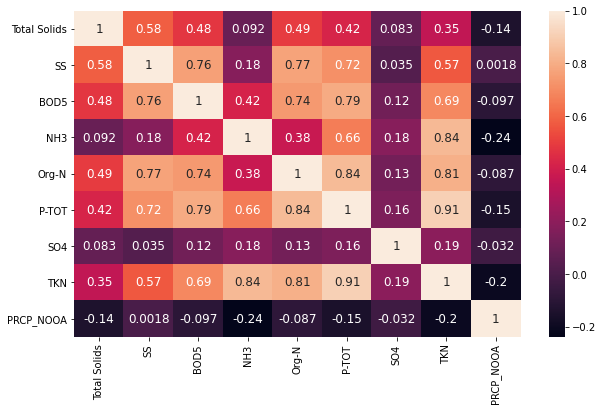

In [21]:
corr = series.corr()
corr
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [53]:
from statsmodels.stats.diagnostic import unitroot_adf
for i in series.columns:
    print(unitroot_adf(series[i].dropna()))

(-7.385515509766936, 8.256931205238992e-11, 29, 6544, {'1%': -3.431349674045335, '5%': -2.8619817707732094, '10%': -2.5670051511687295}, 87162.17539037098)
(-9.231910509629868, 1.6695464122998139e-15, 32, 6541, {'1%': -3.4313501327214255, '5%': -2.86198197343487, '10%': -2.5670052590498456}, 82458.93304979392)
(-8.685754340822484, 4.1679332202788225e-14, 27, 6546, {'1%': -3.431349368494932, '5%': -2.8619816357686574, '10%': -2.5670050793029358}, 73353.83931114693)
(-8.027046606908279, 2.004343524566082e-12, 35, 6538, {'1%': -3.4313505918186142, '5%': -2.8619821762825577, '10%': -2.5670053670299926}, 32407.847567154582)
(-8.154215410077065, 9.51572459063088e-13, 34, 6539, {'1%': -3.4313504387393934, '5%': -2.8619821086459765, '10%': -2.5670053310255985}, 38464.49733180842)
(-8.071812800278005, 1.5423313370735845e-12, 34, 6539, {'1%': -3.4313504387393934, '5%': -2.8619821086459765, '10%': -2.5670053310255985}, 23273.00775788119)
(-9.603081196801352, 1.8975812355844166e-16, 35, 6538, {'1%

In [67]:
for i in series.columns:
    for j in series.columns:
        print("***************************************")
        print(i + " influence " + j)
        print(grangercausalitytests(series[[i, j]], maxlag=2, addconst=True, verbose=True))
        print("***************************************")

***************************************
Total Solids influence Total Solids

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=6571, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F=1561.5351, p=0.0000  , df_denom=6571, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=6569, df_num=2
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=873.2326, p=0.0000  , df_denom=6569, df_num=2
{1: ({'ssr_ftest': (1.5157878970529947e-12, 0.9999990362611098, 6571.0, 1), 'ssr_chi2test': (1.5162492538927613e-12, 0.9999990175162826, 1), 'lrtest': (-0.0, 1.0, 1), 'params_ftest': (1561.5351048552263, 1.355205351635127e-306, 6571.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at

In [66]:
maxlag=1
test = 'ssr-chi2test'
def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

grangers_causality_matrix(series, variables = series.columns)  

,Total Solids_x,SS_x,BOD5_x,NH3_x,Org-N_x,P-TOT_x,SO4_x,TKN_x,PRCP_NOOA_x
Total Solids_y,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4141,0.0000,0.0
SS_y,0.0059,1.0000,0.0000,0.0000,0.0001,0.0000,0.1818,0.0000,0.0
BOD5_y,0.0000,0.0000,1.0000,0.0000,0.0445,0.0000,0.0000,0.0000,0.0
NH3_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0335,0.0000,0.0
Org-N_y,0.0000,0.0000,0.2690,0.0000,1.0000,0.0003,0.0000,0.0000,0.0
P-TOT_y,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0
SO4_y,0.0000,0.0058,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0
TKN_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0003,1.0000,0.0
PRCP_NOOA_y,0.1913,0.0013,0.0384,0.4108,0.0297,0.0414,0.2870,0.0849,1.0
